In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data

In [3]:
Transaction = pd.read_csv('data/E-Commerce.csv', encoding = "ISO-8859-1")

# Examining Data

In [4]:
Transaction.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
Transaction.shape

(541909, 8)

In [6]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Set Date from String Format to DateTime Format

In [9]:
Transaction['InvoiceDate'] = pd.to_datetime(Transaction['InvoiceDate'])

In [10]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
Transaction['InvoiceDate'] = Transaction['InvoiceDate'].sort_values()

In [12]:
Transaction.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Creating a New Colums for Sales

In [13]:
Transaction['Sales'] = Transaction['Quantity'] * Transaction['UnitPrice']

In [14]:
Transaction.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Boolean Indexing for Selection

In [15]:
Transaction = Transaction[(Transaction['Sales'] < 5000) & (Transaction['Sales'] > 0)]

In [16]:
Transaction.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [18]:
Transaction = Transaction.set_index('InvoiceDate')

In [19]:
Sales_per_month = Transaction['Sales'].resample('M').sum()

In [20]:
Sales_per_month

InvoiceDate
2010-12-31     810204.810
2011-01-31     607641.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     531269.221
2011-05-31     762393.270
2011-06-30     722769.900
2011-07-31     719221.191
2011-08-31     748076.320
2011-09-30    1051445.452
2011-10-31    1154979.300
2011-11-30    1509496.330
2011-12-31     470323.080
Freq: M, Name: Sales, dtype: float64

# Ploting

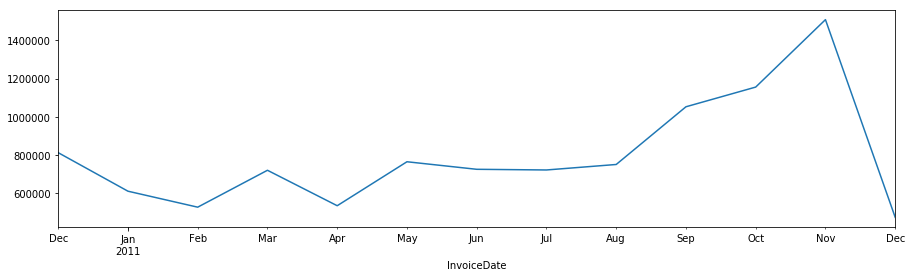

In [22]:
Sales_per_month.plot(kind='line', figsize=(15, 4))

In [23]:
Sales_per_month = Sales_per_month['2010-12-01': '2011-11-30']

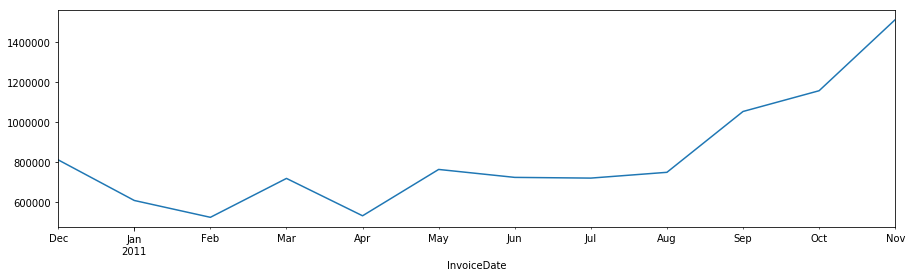

In [24]:
Sales_per_month.plot(kind='line', figsize=(15, 4))

## Box Plot

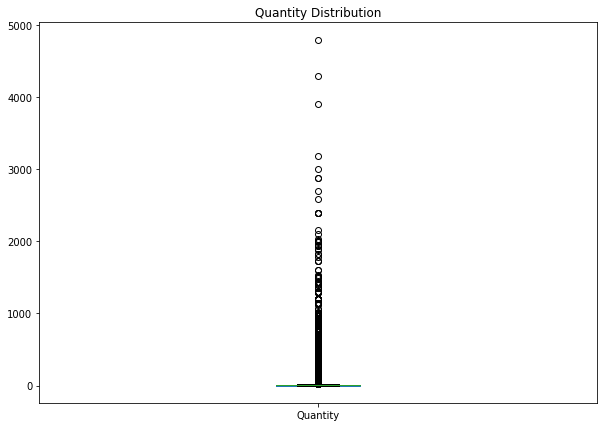

In [25]:
Transaction['Quantity'].plot(kind='box', figsize=(10, 7), title='Quantity Distribution')

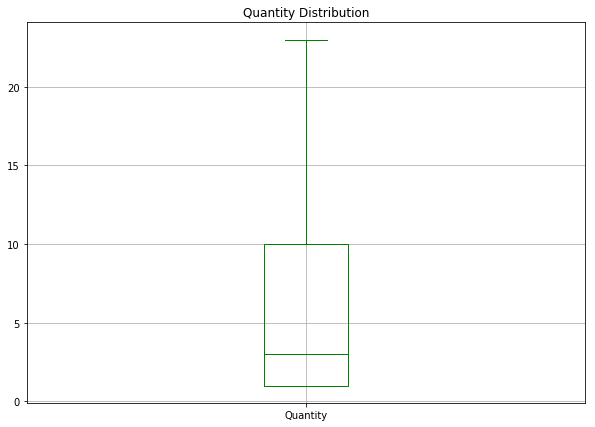

In [26]:
Transaction['Quantity'].plot(kind='box', figsize=(10, 7), title='Quantity Distribution', showfliers=False, grid=True, color='green')

In [27]:
TV = Transaction['Quantity'].value_counts()

In [28]:
TV.head()

1     147820
2      81699
12     61044
6      40839
4      38442
Name: Quantity, dtype: int64

In [29]:
TV.sum()

530095

In [31]:
TQ50 = TV[TV.index <= 50]


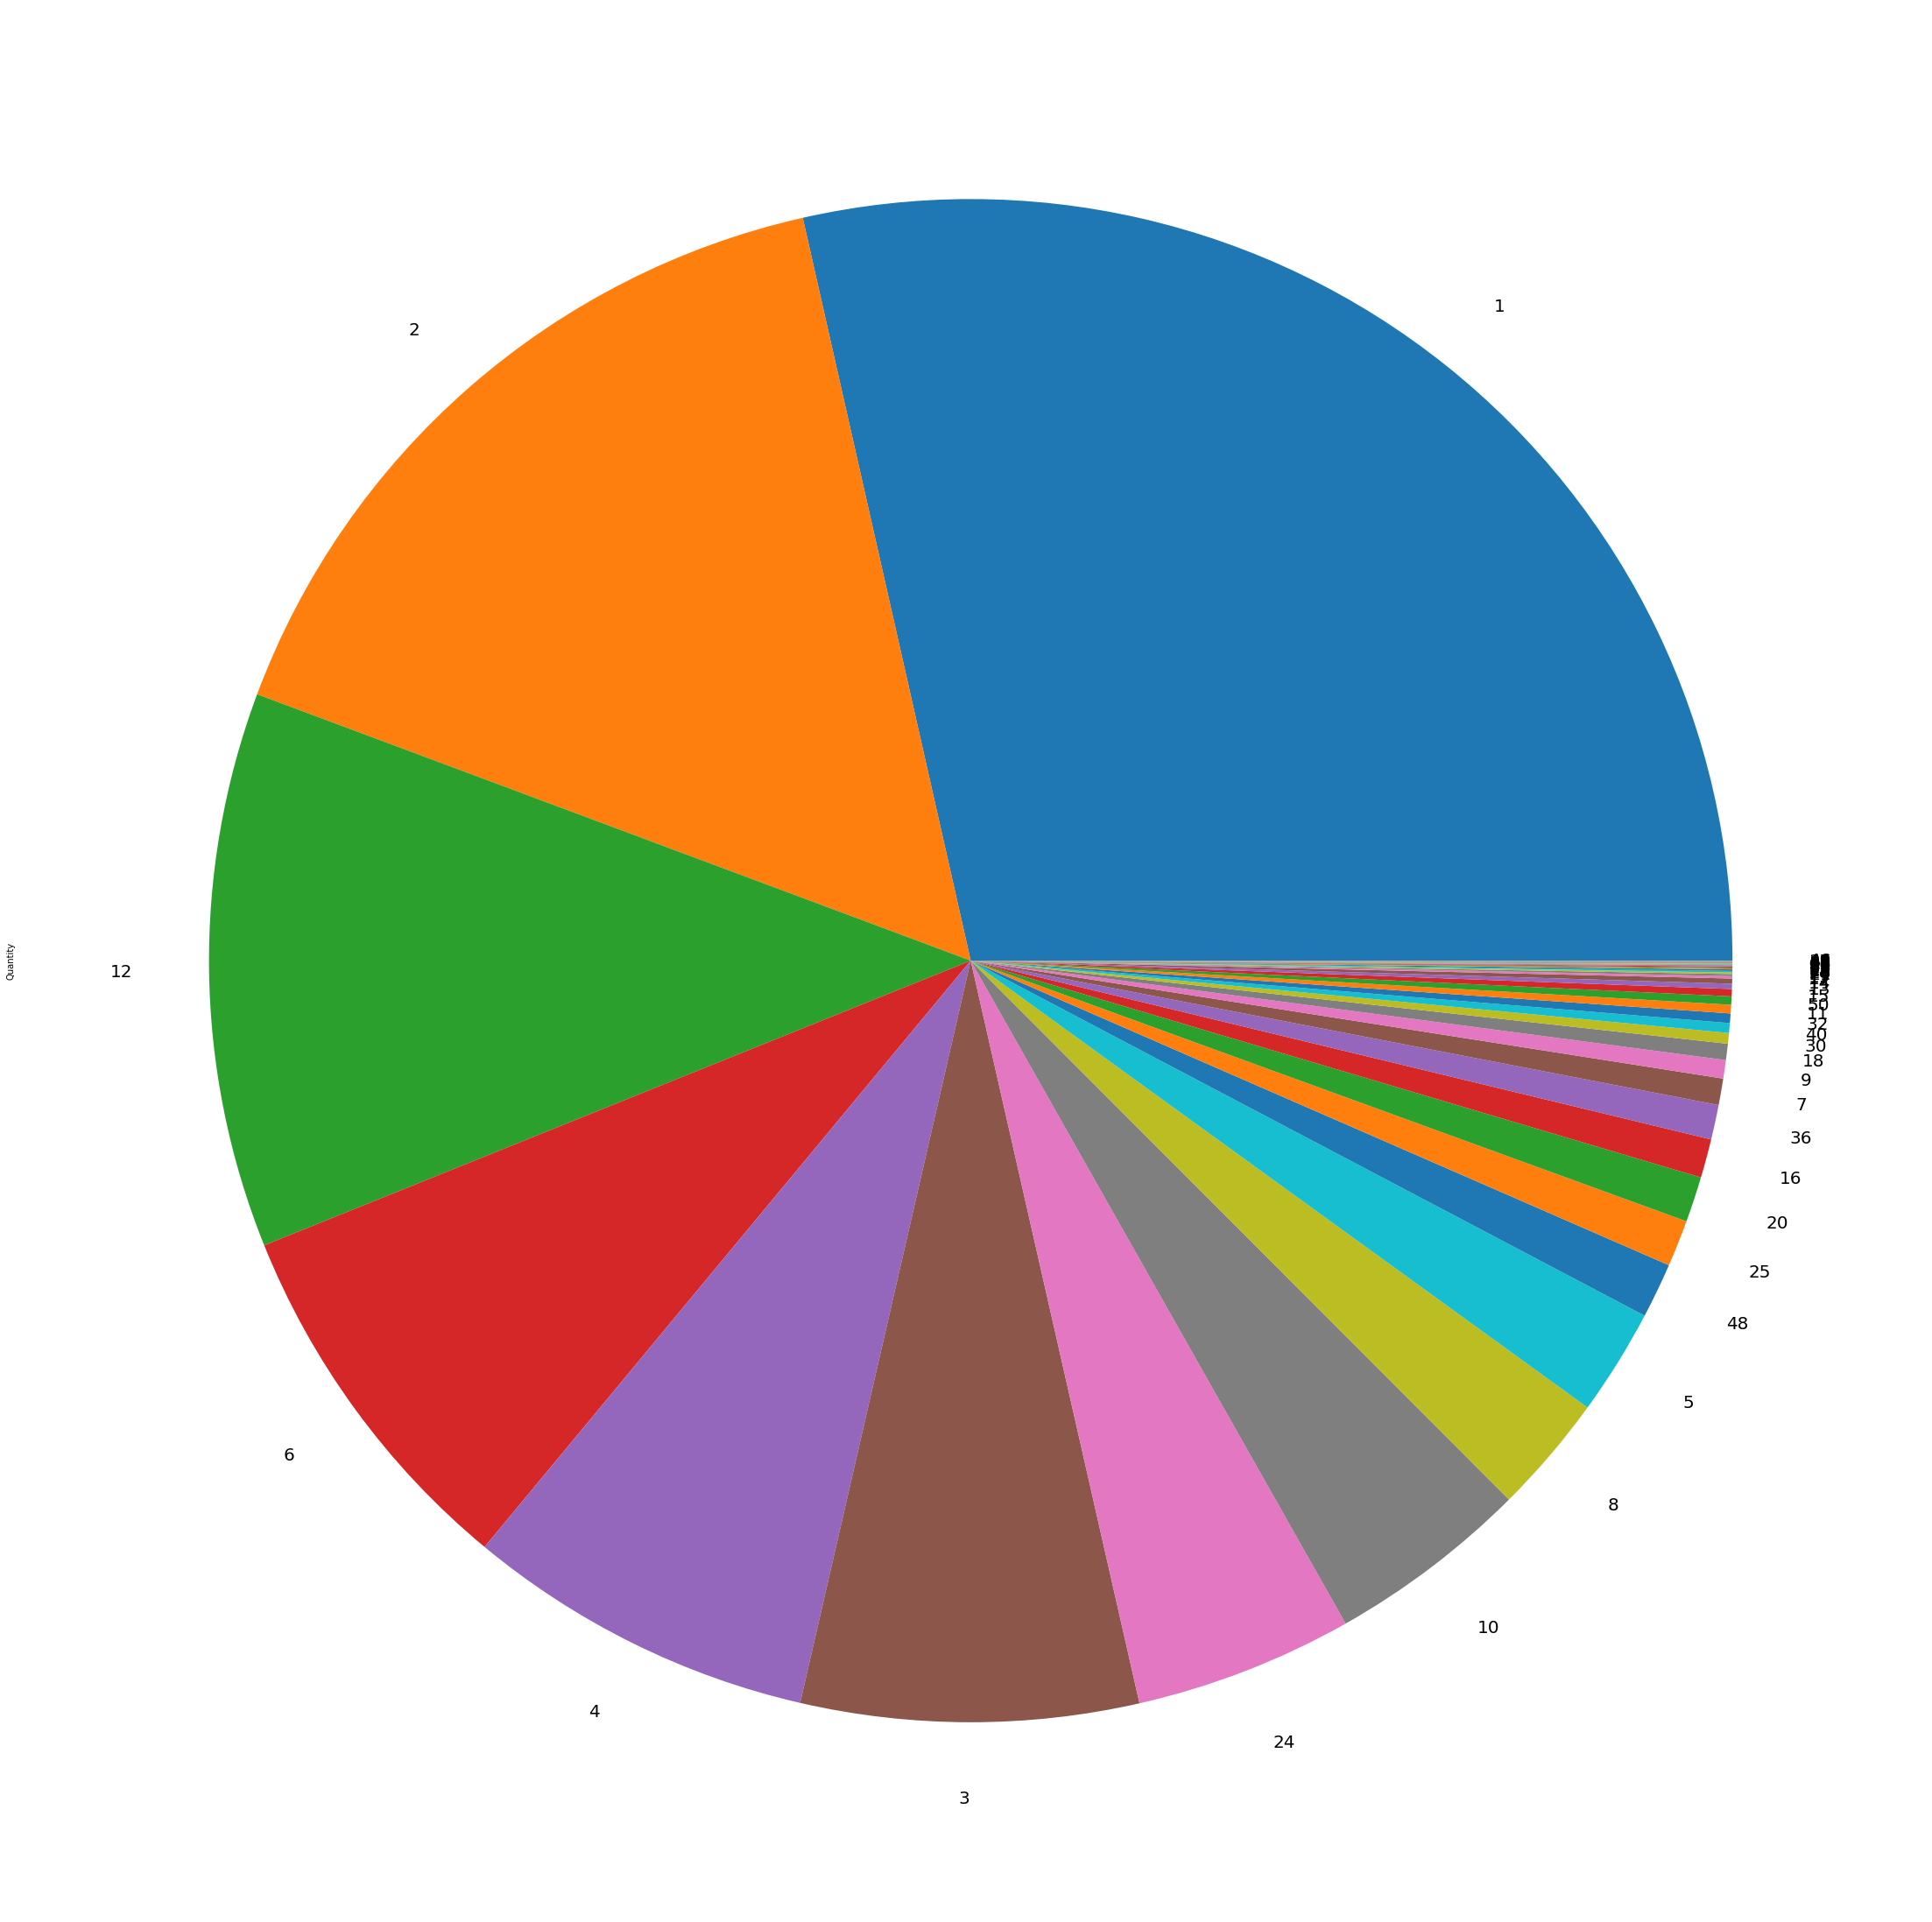

In [32]:
TQ50.plot(kind='pie', figsize=(40, 40), fontsize=20)

In [33]:
TQ25 = Transaction[Transaction['Quantity'] < 25]

In [34]:
TQ25.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Sales
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34


In [36]:
TQ25 = TQ25['Quantity'].value_counts()

In [37]:
TQ25.head()

1     147820
2      81699
12     61044
6      40839
4      38442
Name: Quantity, dtype: int64

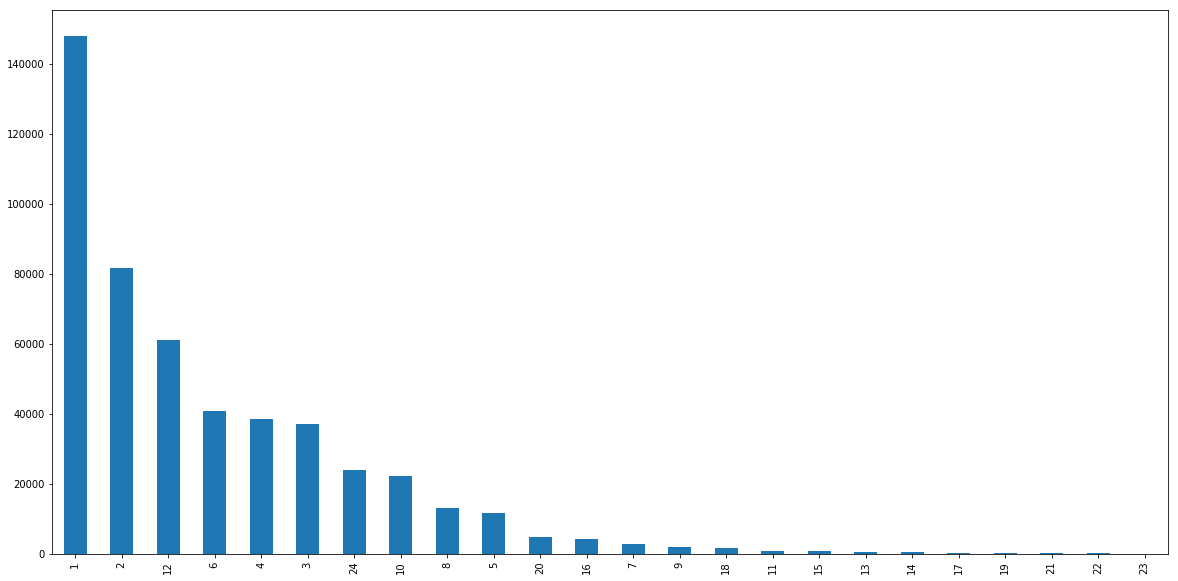

In [39]:
TQ25.plot(kind='bar', figsize=(20,10))

In [41]:
Transaction['Description'].nunique()

4024

In [42]:
Transaction = Transaction.reset_index()

In [43]:
Transaction.head()

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Sales
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
3,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
4,2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34


In [44]:
DV = Transaction['Description'].value_counts()

In [45]:
DV.head()

WHITE HANGING HEART T-LIGHT HOLDER    2323
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2017
PARTY BUNTING                         1706
LUNCH BAG RED RETROSPOT               1594
Name: Description, dtype: int64

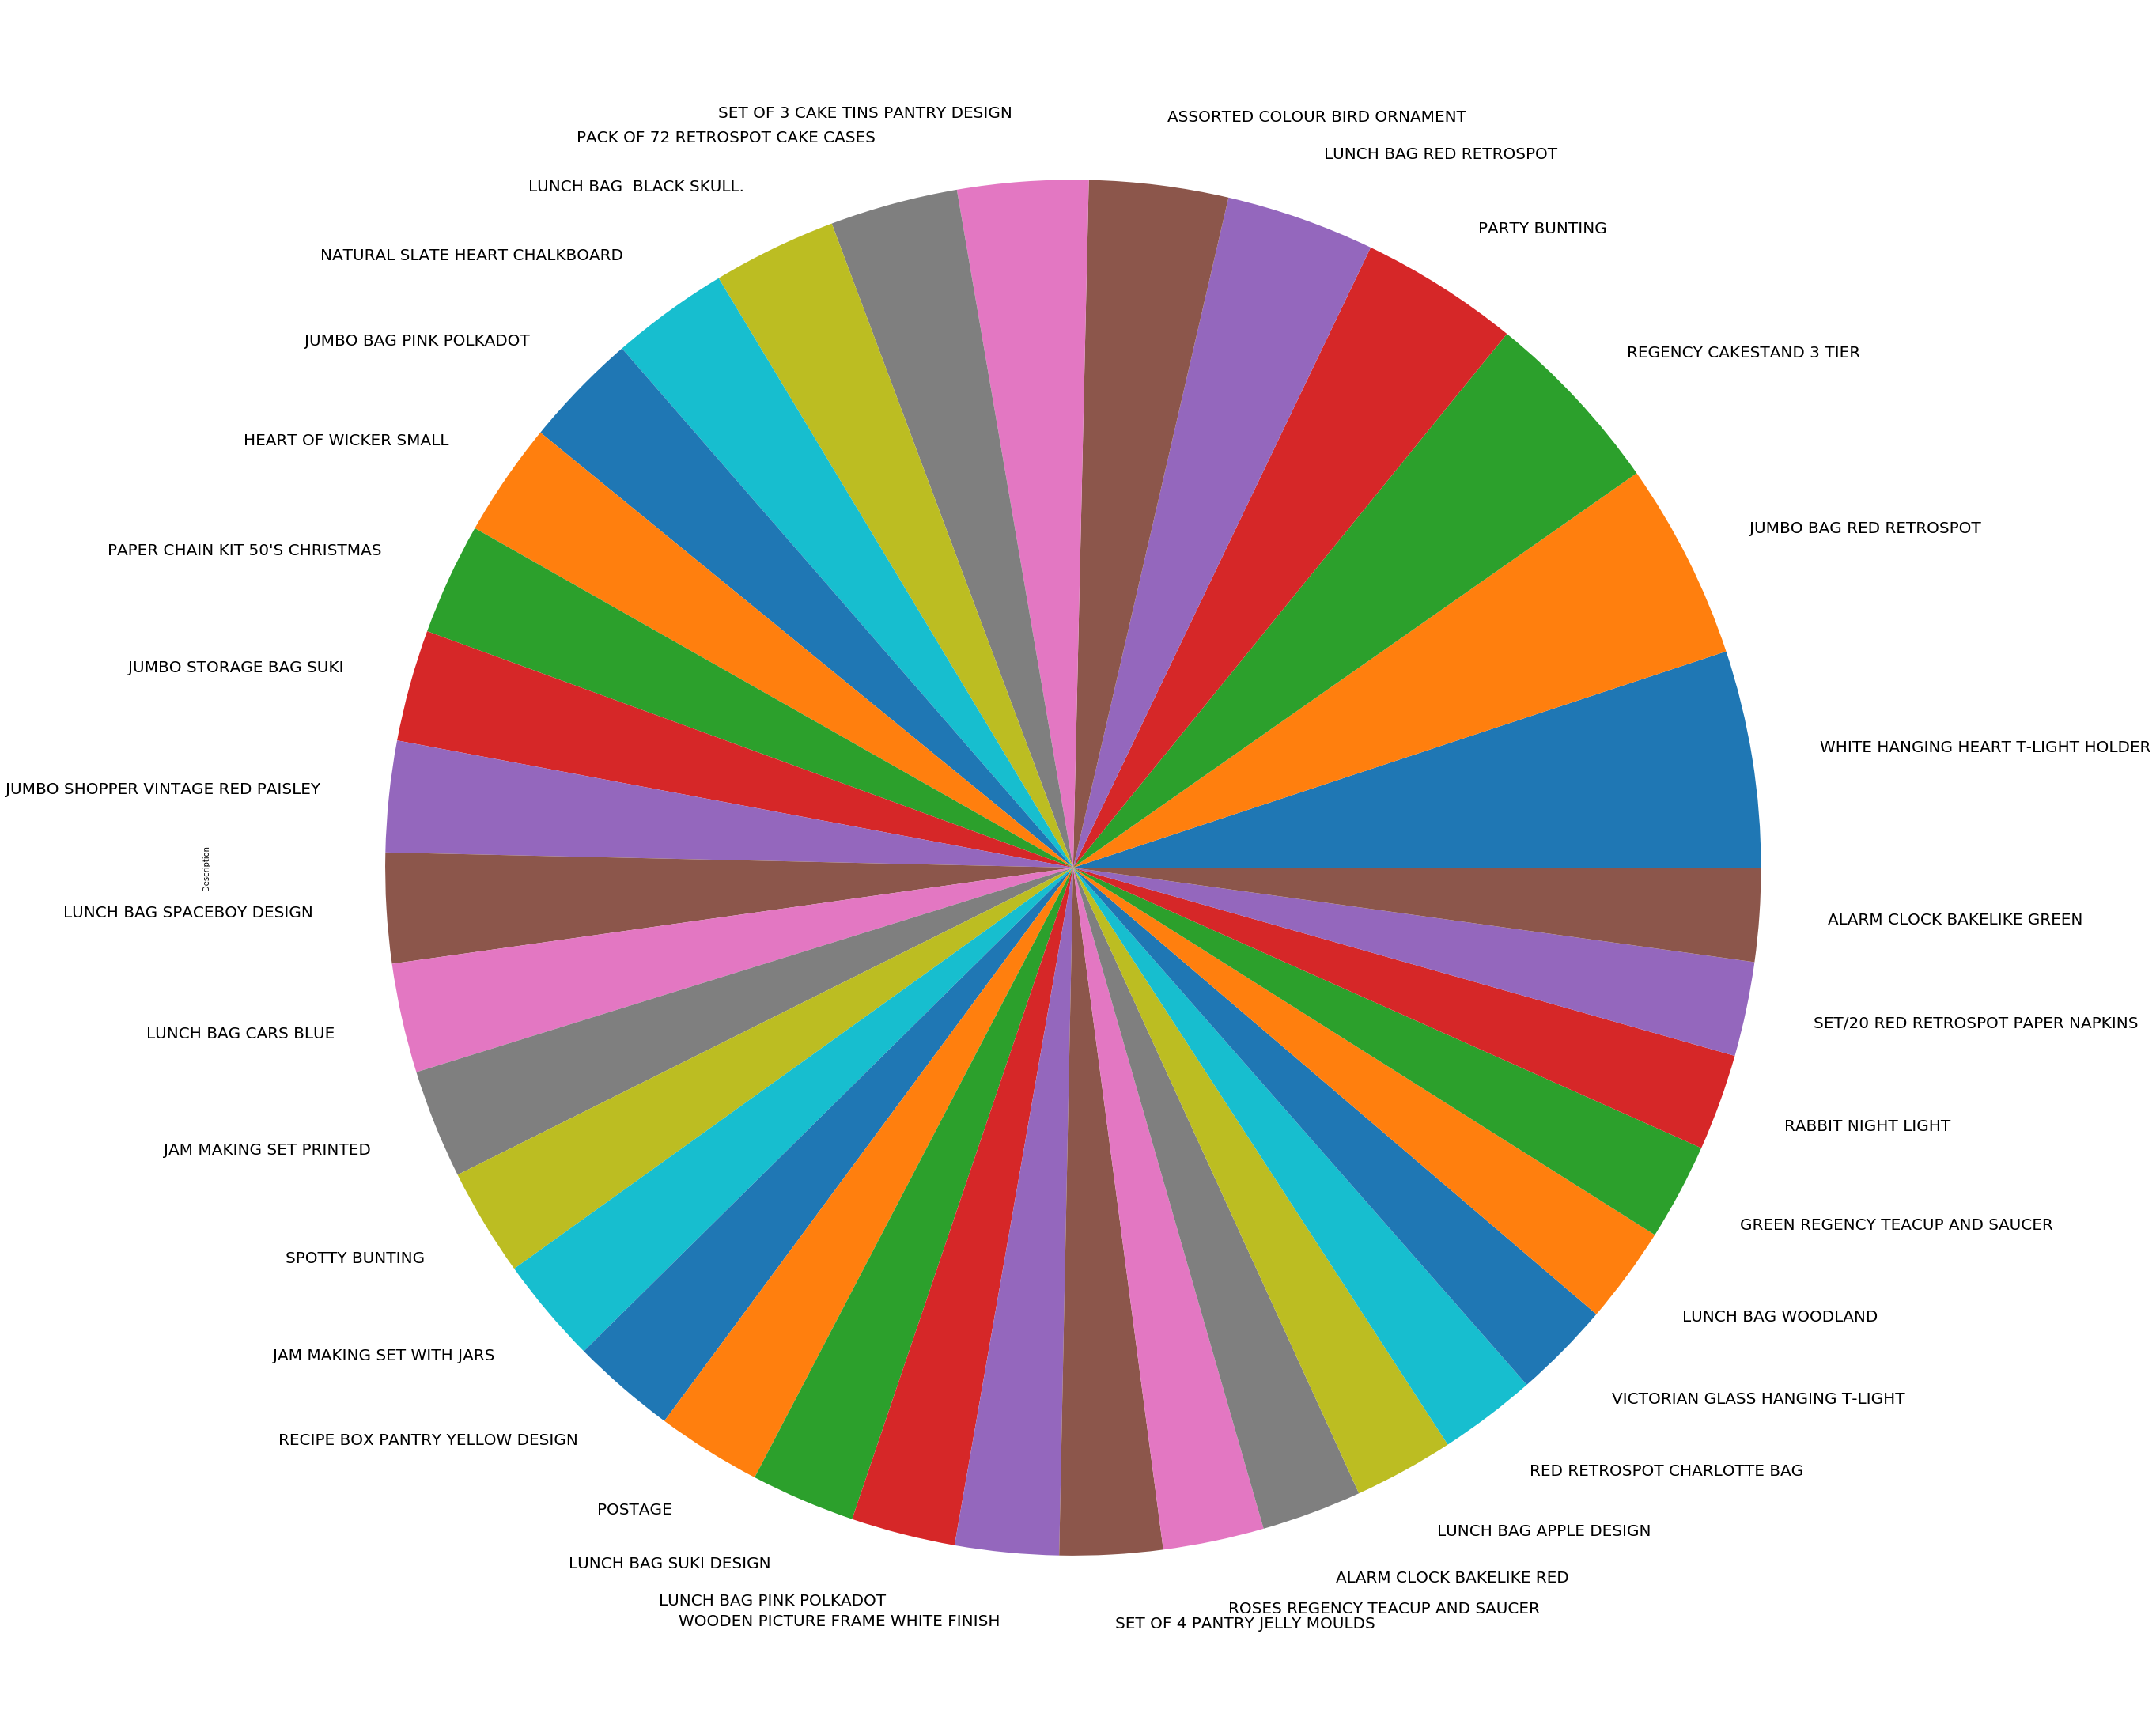

In [46]:
DV[DV >= 1000].plot(kind='pie', figsize=(40, 40), fontsize=20)

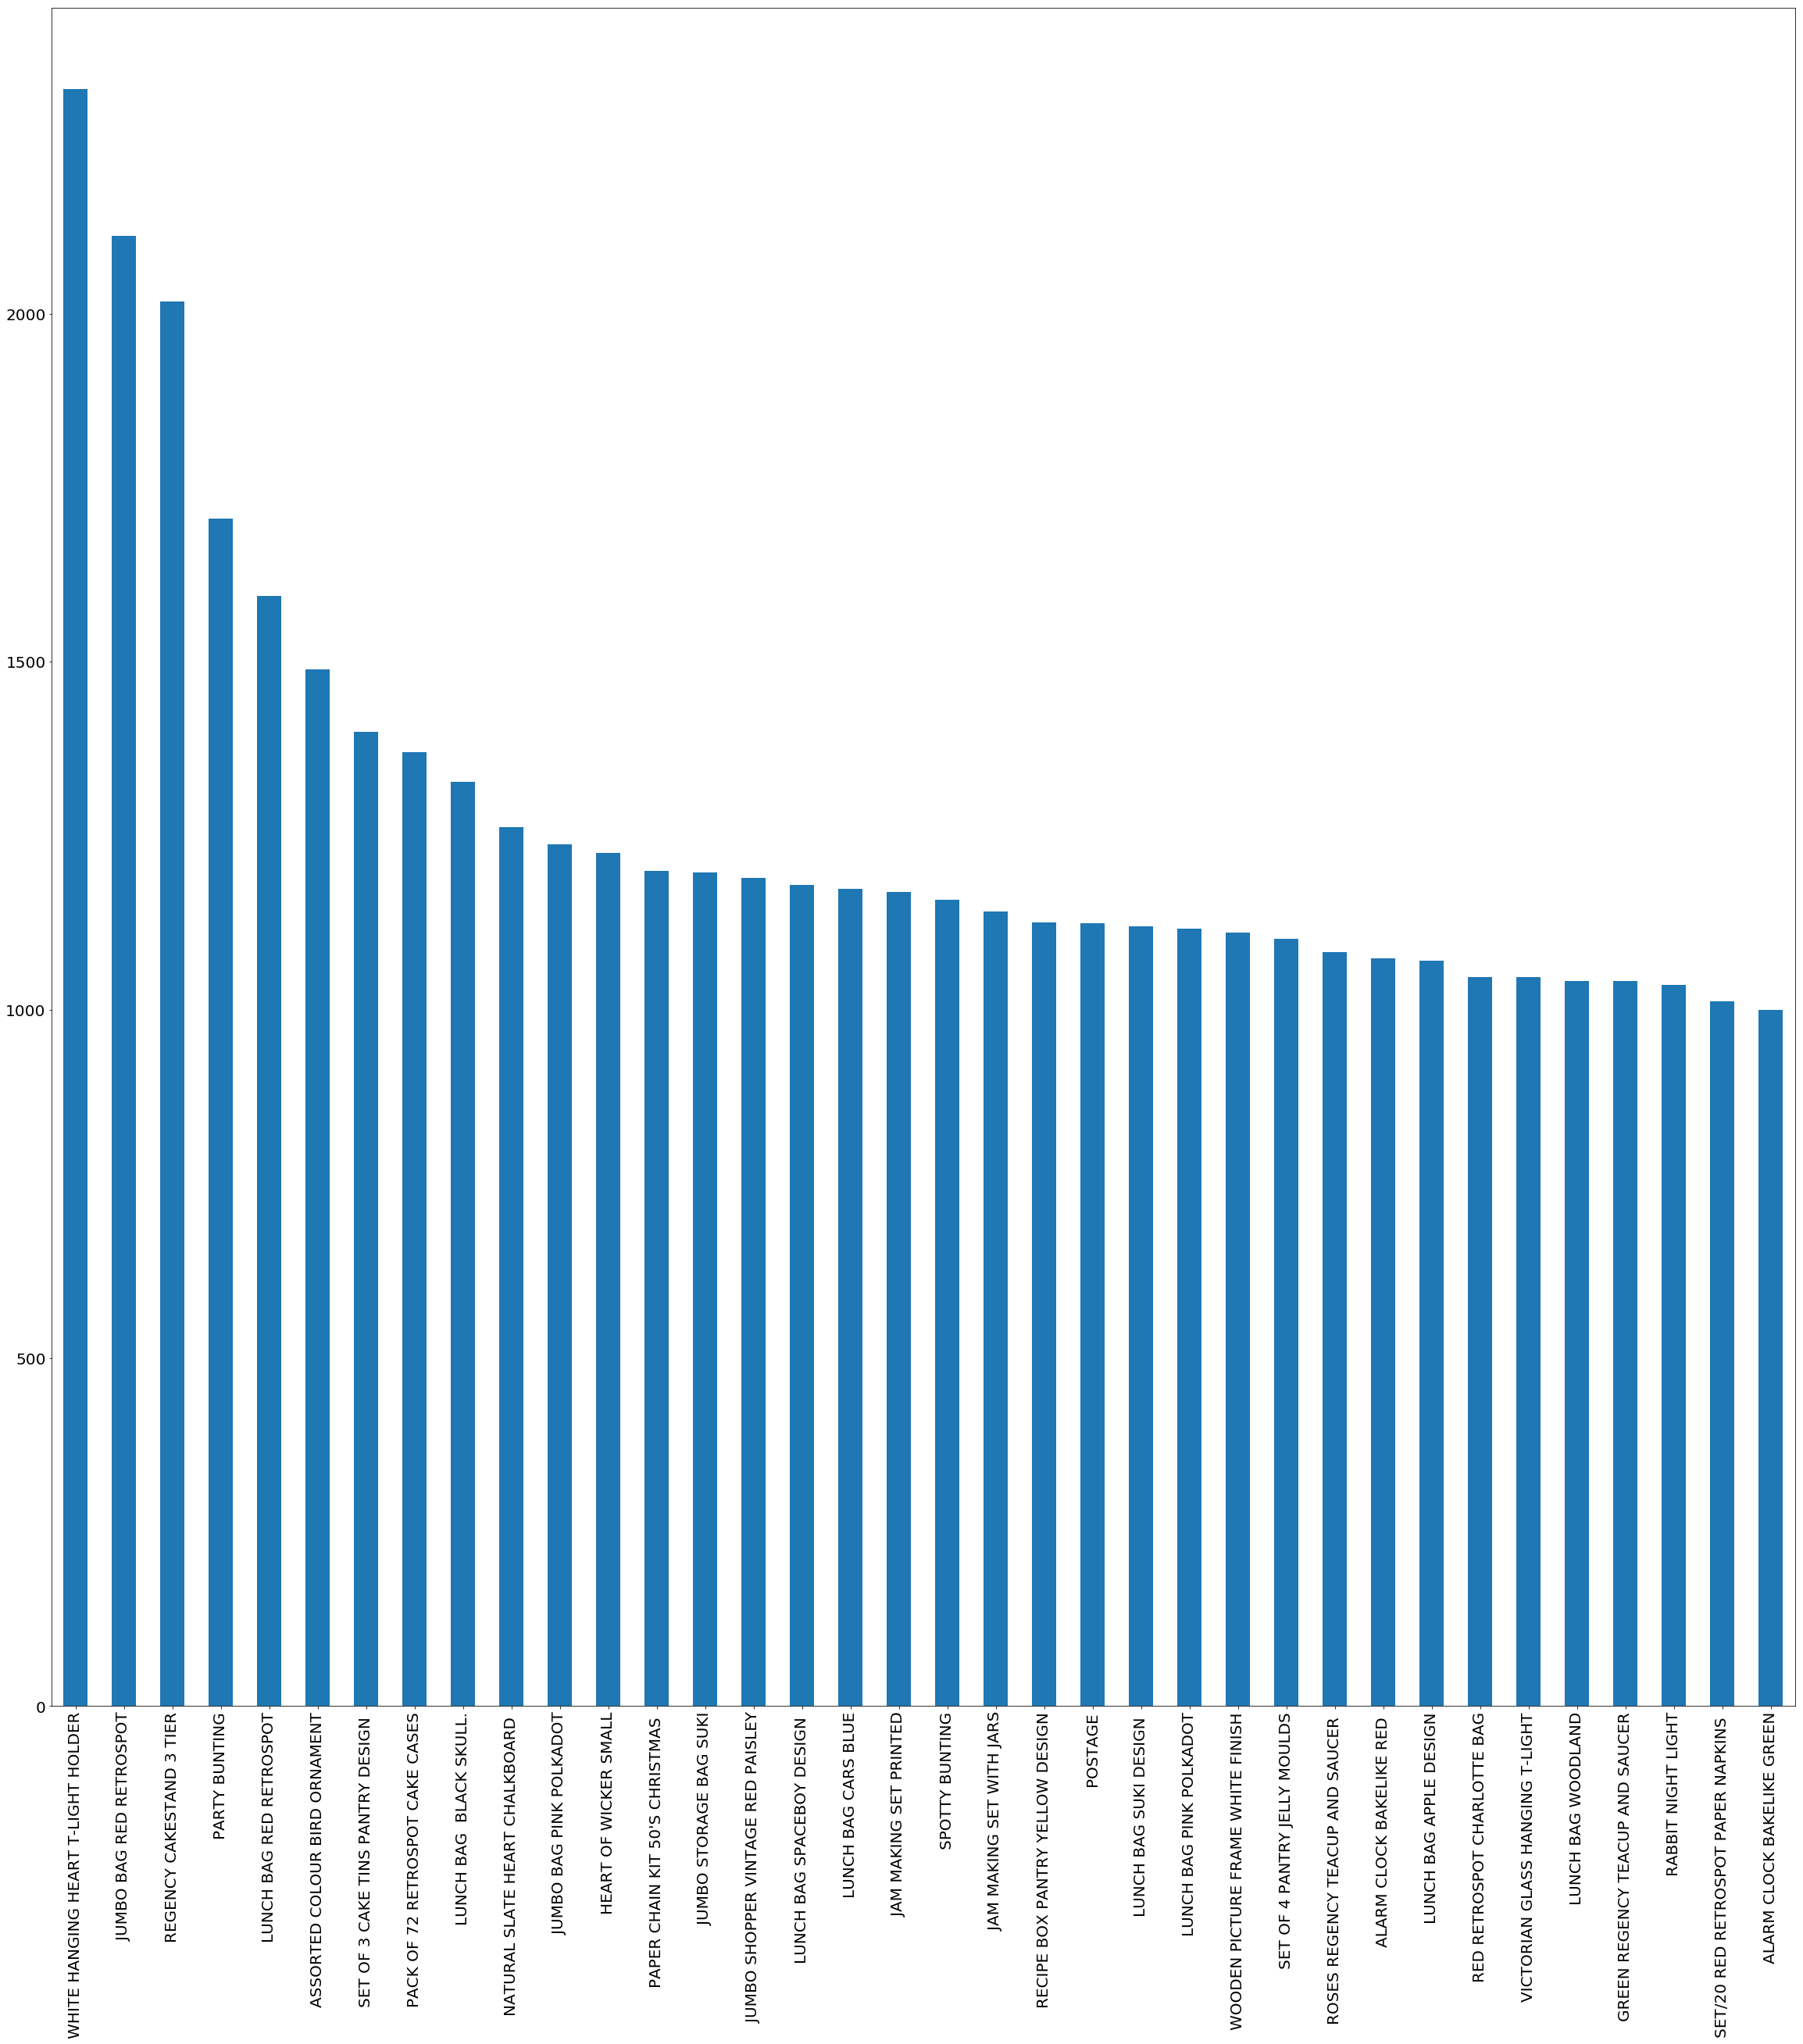

In [47]:
DV[DV >= 1000].plot(kind='bar', figsize=(40, 40), fontsize=20)